# Count/Frequency variables

- Another way to refer to variables that have a multitude of categories, is to call them variables with high cardinality
- count data is a statistical data type, a type of data in which the observations can take only the non-negative integer values {0, 1, 2, 3, ...}, and where these integers arise from counting rather than ranking

# 1)-Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For data processing and maths
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# 2)- Loading dataset 

https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

In [3]:
data = pd.read_csv('train.csv', usecols=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'y'])
data.head()

,y,X1,X2,X3,X4,X5,X6
0,130.81,v,at,a,d,u,j
1,88.53,t,av,e,d,y,l
2,76.26,w,n,c,d,x,j
3,80.62,t,n,f,d,x,l
4,78.02,v,n,f,d,h,d


# 3)- Data exploring

In [4]:
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(data)
table_dtype

,Data Type
y,float64
X1,object
X2,object
X3,object
X4,object
X5,object
X6,object


In [5]:
# let's have a look at how many labels

for col in data.columns[1:]:
    print(col, ': ', len(data[col].unique()), ' labels')

X1 :  27  labels
X2 :  44  labels
X3 :  7  labels
X4 :  4  labels
X5 :  29  labels
X6 :  12  labels


In [6]:
data.X4.value_counts()

d    4205
a       2
c       1
b       1
Name: X4, dtype: int64

One category is very dominant while others are too small.

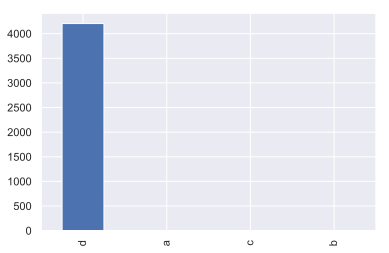

In [7]:
data.X4.value_counts().plot(kind='bar')

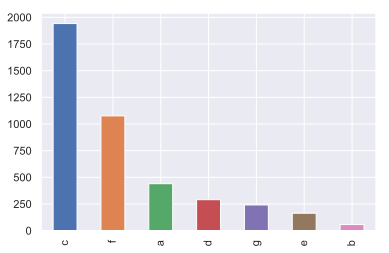

In [8]:
data.X3.value_counts().plot(kind='bar')

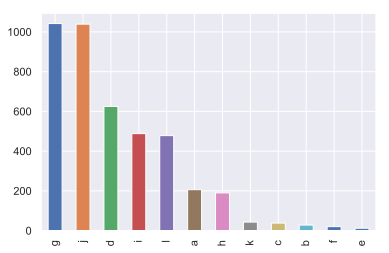

In [9]:
data.X6.value_counts().plot(kind='bar')

# 4)-Encoding data

When doing count transformation of categorical variables, it is important to calculate the count (or frequency = count/total observations) over the training set, and then use those numbers to replace the labels in the test set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']], data.y,
                                                    test_size=0.3,
                                                    random_state=0)

In [11]:
X_train.shape, X_test.shape

((2946, 6), (1263, 6))

In [12]:
# let's obtain the counts for each one of the labels in variable X2


X_train.X2.value_counts()

as    1155
ae     342
ai     289
m      284
ak     188
r      101
n       97
s       63
e       61
f       59
aq      46
ay      40
a       34
t       17
k       16
i       15
ag      15
z       14
d       12
b       12
g       10
ac      10
ao      10
y        8
x        8
at       5
ap       5
h        4
ah       3
al       3
au       3
q        3
an       3
aw       2
av       2
l        1
am       1
c        1
p        1
o        1
af       1
aa       1
Name: X2, dtype: int64

In [13]:
# let's capture this in a dictionary that we can use to re-map the labels
X_train.X2.value_counts().to_dict()

{'as': 1155,
 'ae': 342,
 'ai': 289,
 'm': 284,
 'ak': 188,
 'r': 101,
 'n': 97,
 's': 63,
 'e': 61,
 'f': 59,
 'aq': 46,
 'ay': 40,
 'a': 34,
 't': 17,
 'k': 16,
 'i': 15,
 'ag': 15,
 'z': 14,
 'd': 12,
 'b': 12,
 'g': 10,
 'ac': 10,
 'ao': 10,
 'y': 8,
 'x': 8,
 'at': 5,
 'ap': 5,
 'h': 4,
 'ah': 3,
 'al': 3,
 'au': 3,
 'q': 3,
 'an': 3,
 'aw': 2,
 'av': 2,
 'l': 1,
 'am': 1,
 'c': 1,
 'p': 1,
 'o': 1,
 'af': 1,
 'aa': 1}

In [14]:
# lets look at X_train so we can compare then the variable re-coding

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,ai,c,d,q,g
3014,b,m,c,d,q,i
3368,o,f,f,d,s,l
2772,aa,as,d,d,p,j
3383,v,e,c,d,s,g


In [15]:
# And now let's replace each label in X2 by its count

# first we make a dictionary that maps each label to the counts
X_frequency_map = X_train.X2.value_counts().to_dict()

In [16]:
#we replace X2 labels both in train and test set with the same map
X_train.X2 = X_train.X2.map(X_frequency_map)
X_test.X2 = X_test.X2.map(X_frequency_map)

X_train.head()

,X1,X2,X3,X4,X5,X6
3059,aa,289,c,d,q,g
3014,b,284,c,d,q,i
3368,o,59,f,d,s,l
2772,aa,1155,d,d,p,j
3383,v,61,c,d,s,g


check X2 as it has changed to numbers. The observation 1 in the variable 2 before it was 'ai', now it was replaced by the count 289. And so on for the rest of the categories

If a category is present in the test set, that was not present in the train set, this method will generate missing data in the test set. This is why it is extremely important to handle rare categories, as we say in section 6 of this course